## Your Role in this Exercise

Imagine that you serve as the head of the Inventory Division of a leading grocery retailer with about 450 large stores across Europe. Your team is responsible for managing the inventory operations of the organization. One of the major challenges that your team aims to address is the issue of inventory errors.

## The Business Challenge: Inventory Errors

Ensuring the availability of fast-moving items is essential for grocery retailers like your company. To this end, maintaining accurate inventory records has been, and remains, a central problem for managing retail operations. In many cases, however, retailers are unable to make accurate reordering decisions because their inventory records (i.e. how much is actually available on the shelf) are inaccurate. These discrepancies between the physical and recorded stock lead to poor reordering decisions, the over- or understocking of products that increase waste or lost sales, respectively.

# 2. Setup

### Import libraries

Import libraries for managing data structures and plotting figures

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

### Import the dataset

Note that all the values for continuous variables have been normalized to facilitate the algorithm training process. Thus, they do not reflect the actual numbers that were recorded by the business.

In [2]:
data = pd.read_csv("https://sbs-ml.s3.eu-west-1.amazonaws.com/StockErrors-2.csv")

In [3]:
data.head(6)

,book_stock_0,case_size,case_weight,store_life,price,freq,rem_life,last_count_1,scan_freq,shelf_cap,...,book_stock_2,counts,change,rejection,SKU_l1,SKU_l2,SKU_l3,fresh,size,stock_error
0,0.309124,0.066787,0.000000,0.332521,0.097625,0.081851,0.306519,0.093523,0.138026,0.078236,...,0.478851,0.102392,1.002154,0.003920,G,G1,G16,0.0,L,1.0
1,0.353862,0.110186,0.014141,0.183649,0.178863,0.250265,0.193292,0.247673,0.000000,0.081874,...,0.485379,0.031260,0.997516,0.008149,G,G5,G51,0.0,L,1.0
2,0.317169,0.043406,0.000000,0.003590,0.745574,0.079222,0.987711,0.543073,0.140464,0.052502,...,0.474031,0.063054,1.006205,0.000000,N,N5,N56,-1.0,M,1.0
3,0.432924,0.059134,0.023364,0.054174,0.248905,0.697323,0.101725,0.579191,0.001632,0.161566,...,0.521249,0.000000,0.000000,0.003920,W,W3,W31,0.0,M,1.0
4,0.282390,0.001063,0.013094,0.001263,0.706411,0.000000,0.053647,0.450560,0.000000,0.012922,...,0.453709,0.040997,0.002671,0.001235,F,F5,F55,1.0,M,0.0
5,0.491921,0.316696,0.003502,0.104830,0.040806,0.161616,0.134732,0.125435,0.000000,0.279300,...,0.552731,0.137550,0.505731,0.000000,G,G7,G71,0.0,M,1.0


In [4]:
#mine
print(data.columns)
print(data.info())

Index(['book_stock_0', 'case_size', 'case_weight', 'store_life', 'price',
       'freq', 'rem_life', 'last_count_1', 'scan_freq', 'shelf_cap',
       'last_count_2', 'sales_1', 'sales_2', 'forecast_1', 'forecast_2',
       'waste_1', 'waste_2', 'book_stock_1', 'book_stock_2', 'counts',
       'change', 'rejection', 'SKU_l1', 'SKU_l2', 'SKU_l3', 'fresh', 'size',
       'stock_error'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367937 entries, 0 to 367936
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   book_stock_0  367937 non-null  float64
 1   case_size     367937 non-null  float64
 2   case_weight   367937 non-null  float64
 3   store_life    367937 non-null  float64
 4   price         367937 non-null  float64
 5   freq          367937 non-null  float64
 6   rem_life      367937 non-null  float64
 7   last_count_1  367937 non-null  float64
 8   scan_freq     367937 non-null  floa

# 3. Data exploration

### Numerical exploration

Number of columns and rows in the dataset

In [5]:
print('Data size : ', data.shape)

Data size :  (367937, 28)


Checking for missing values

In [6]:
print('Null values per column : \n', data.isnull().sum())

Null values per column : 
 book_stock_0    0
case_size       0
case_weight     0
store_life      0
price           0
freq            0
rem_life        0
last_count_1    0
scan_freq       0
shelf_cap       0
last_count_2    0
sales_1         0
sales_2         0
forecast_1      0
forecast_2      0
waste_1         0
waste_2         0
book_stock_1    0
book_stock_2    0
counts          0
change          0
rejection       0
SKU_l1          0
SKU_l2          0
SKU_l3          0
fresh           0
size            0
stock_error     0
dtype: int64


Calculating the basic statistics for each column

In [7]:
data.describe()

,book_stock_0,case_size,case_weight,store_life,price,freq,rem_life,last_count_1,scan_freq,shelf_cap,...,forecast_2,waste_1,waste_2,book_stock_1,book_stock_2,counts,change,rejection,fresh,stock_error
count,367937.000000,367937.000000,367937.000000,367937.000000,367937.000000,367937.000000,367937.000000,367937.000000,367937.000000,367937.000000,...,367937.000000,367937.000000,367937.000000,367937.000000,367937.000000,367937.000000,367937.000000,367937.000000,367937.000000,367937.000000
mean,0.346815,0.108129,0.008789,0.137768,0.176119,0.205498,0.295581,0.298139,0.091292,0.131311,...,0.058594,0.113670,0.261342,0.506891,0.494900,0.124988,0.440340,0.021833,-0.094307,0.535162
std,0.081246,0.095307,0.032909,0.173959,0.168689,0.230388,0.329242,0.246130,0.177857,0.131048,...,0.095943,0.076354,0.063641,0.036162,0.036485,0.155062,0.399002,0.108922,0.645287,0.498763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.006278,0.002583,0.000000,0.000799,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,0.294712,0.055534,0.000472,0.004584,0.066559,0.031151,0.060587,0.075758,0.000000,0.049395,...,0.004709,0.096827,0.246827,0.484201,0.472561,0.030325,0.002816,0.000000,-1.000000,0.000000
50%,0.323251,0.081807,0.004932,0.087797,0.115988,0.119387,0.159117,0.233554,0.002945,0.088338,...,0.022005,0.100315,0.250315,0.497171,0.485221,0.070836,0.421444,0.000827,0.000000,1.000000
75%,0.371218,0.146541,0.010400,0.214986,0.222089,0.302895,0.340274,0.526608,0.136210,0.162639,...,0.069429,0.104011,0.253995,0.518007,0.505492,0.169716,0.835767,0.005008,0.000000,1.000000
max,1.000406,1.007145,1.004035,1.006144,1.016098,1.016053,1.017253,1.011473,1.016272,1.010337,...,1.003400,1.012446,1.013557,0.989018,1.004606,1.011805,1.020508,1.011795,1.000000,1.000000


Inspecting the distribution of errors in the inventory records

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<ipython-input-40-af5aebebe305>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<Axes: xlabel='price', ylabel='Density'>

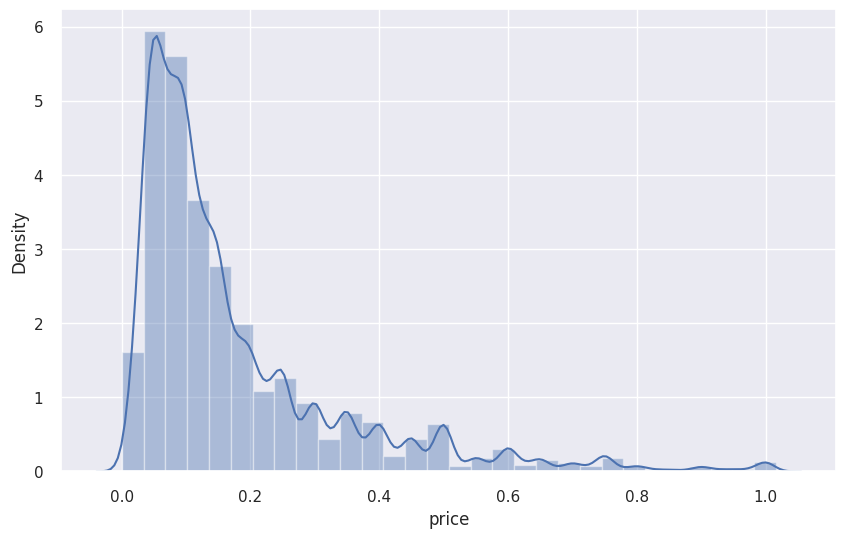

In [40]:
plt.figure(figsize=(10, 6))
sns.distplot(data['price'],bins=30)


In [41]:
data = data.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [42]:
#mine
data.shape

(367937, 28)

In [43]:
print('\nBalance of positive and negative error classes (%): \n',
      data['stock_error'].value_counts(normalize=True) * 100)


Balance of positive and negative error classes (%): 
 1.0    53.516227
0.0    46.483773
Name: stock_error, dtype: float64


In [44]:
corr = data.corr()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<ipython-input-44-17182710d970>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


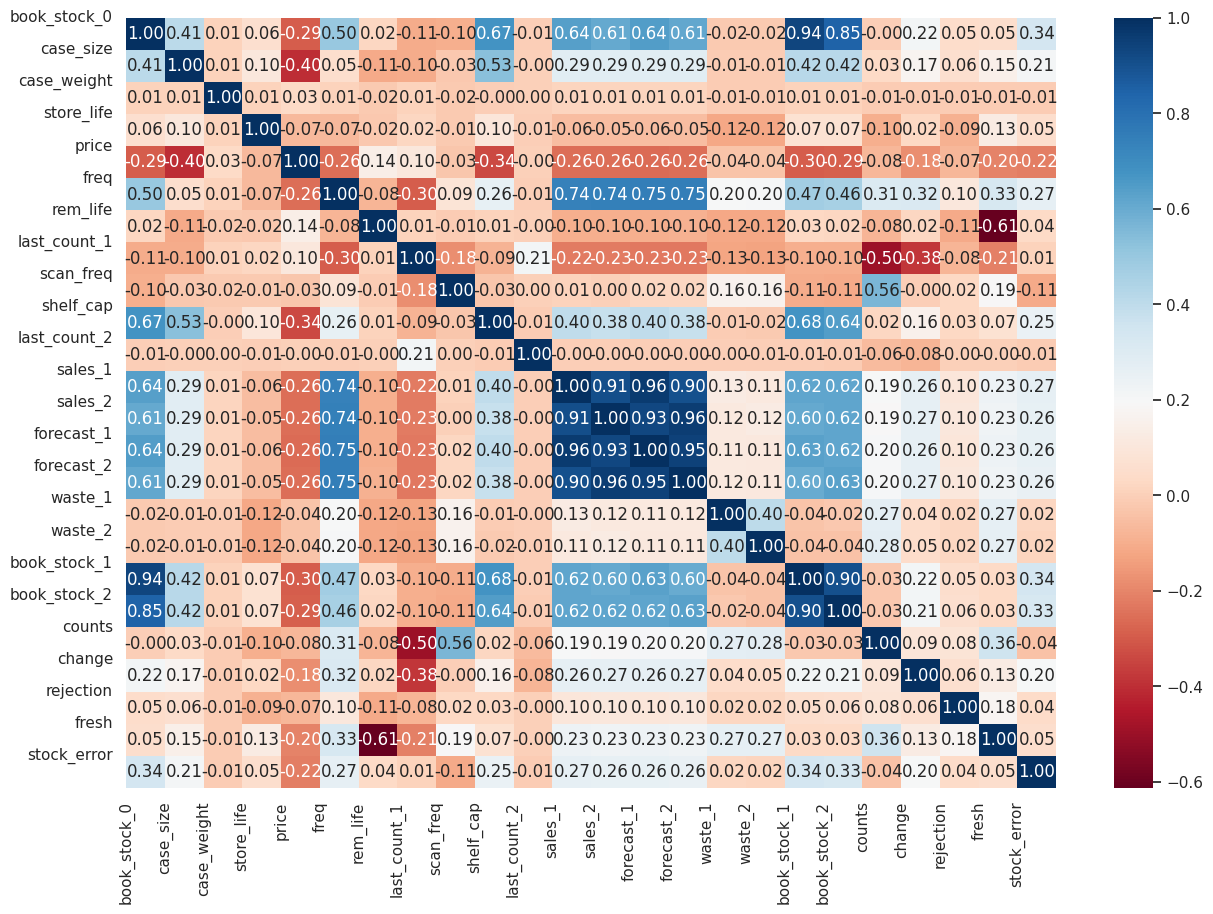

In [12]:
#Plot figsize
fig, ax = plt.subplots(figsize=(15, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.savefig('corr_plot.png')

In [8]:
from sklearn.model_selection import train_test_split

Splitting the independent from the target variable.

In [9]:
X = data.drop(['stock_error'], axis = 1)
target = data['stock_error']

Let's perform one-hot-encoding to ensure that all the variables in the dataset are in numerical format.

In [10]:
cat = X.select_dtypes(include='O').keys()
X_new = pd.get_dummies(X, columns = cat, drop_first=True)

Splitting the data into our training and testing data sets

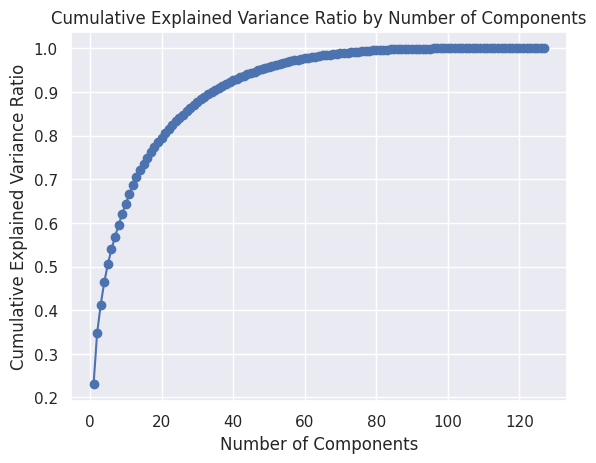

In [24]:
#mine
from sklearn.decomposition import PCA
# Instantiate PCA with the desired number of components
pca = PCA(n_components=X_new.shape[1])

# Fit the PCA model on the data
pca.fit(X_new)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Create an array representing the number of components
n_components = np.arange(1, len(cumulative_variance_ratio) + 1)

# Plot the cumulative explained variance ratio
plt.plot(n_components, cumulative_variance_ratio, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()

In [11]:
#m
print(cat)
print(X_new.shape)

Index(['SKU_l1', 'SKU_l2', 'SKU_l3', 'size'], dtype='object')
(367937, 127)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_new,
                                                    target,
                                                    test_size = 0.3,
                                                    random_state = 44,
                                                    stratify=target)

In [13]:
X_train.shape

(257555, 127)

In [14]:
X_test.shape

(110382, 127)

# 4. Training of Algorithm # 1

### Loading the model

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
clf = RandomForestClassifier(random_state=22)

Training the model

In [38]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=22)

In [39]:
#m

# total_nodes = sum([estimator.tree_.node_count for estimator in clf.estimators])
# print('Total number of nodes in the Random Forest:', total_nodes)

# total_nodes = sum([estimator.tree_.node_count for estimator in clf.estimators_])
# print('Total number of nodes in the Random Forest:', total_nodes)
total_nodes = sum([estimator.tree_.node_count for estimator in clf.estimators_])
print(f'Number of Decision Trees used {clf.n_estimators}')
print('Total number of nodes in the Random Forest:', clf.n_estimators)

Number of Decision Trees used 100
Total number of nodes in the Random Forest: 100


## Making predictions

We set a classification threshold first.


In [30]:
t=0.5

### Predictions on the training set


Computing ROC-AUC

In [52]:
from sklearn.metrics import roc_auc_score, confusion_matrix

In [42]:
prob_est_train = clf.predict_proba(X_train)
roc_train = roc_auc_score(y_train, prob_est_train[:, 1].T)
print('The {} has an ROC-AUC on the training set of {}'.format('Random Forest', roc_train))

The Random Forest has an ROC-AUC on the training set of 1.0


Plotting the Confusion Matrix

In [43]:
y_pred_train_rf = np.where(prob_est_train[:,1] > t, 1, 0)
cm_rf_train = confusion_matrix(y_true=y_train, y_pred=y_pred_train_rf)

Text(0.5, 21.249999999999993, 'Predicted label')

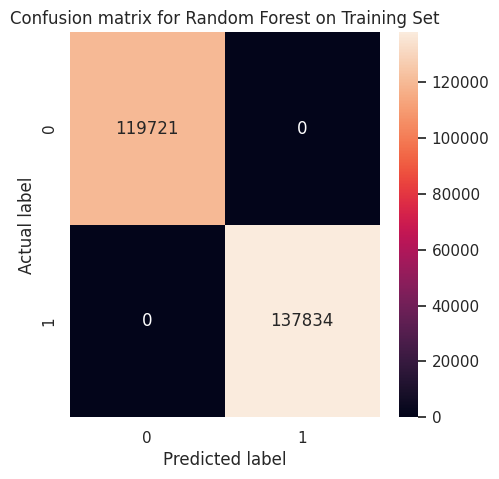

In [45]:
%matplotlib inline
plt.figure(figsize=(5, 5))
sns.heatmap(cm_rf_train, annot=True, fmt="d")
plt.title('Confusion matrix for {}'.format('Random Forest on Training Set'))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Predictions on the testing set

In [46]:
prob_est_test_rf = clf.predict_proba(X_test)
roc_test_rf = roc_auc_score(y_test, prob_est_test_rf[:, 1].T)
print('The {} has an ROC-AUC on the testing set of {}'.format('Random Forest', roc_test_rf))

The Random Forest has an ROC-AUC on the testing set of 0.8000410424426083


Plotting the Confusion Matrix

In [48]:
y_pred_test_rf = np.where(prob_est_test_rf[:,1] > t, 1, 0)
cm_rf_test = confusion_matrix(y_true=y_test, y_pred = y_pred_test_rf)

Text(0.5, 21.249999999999993, 'Predicted label')

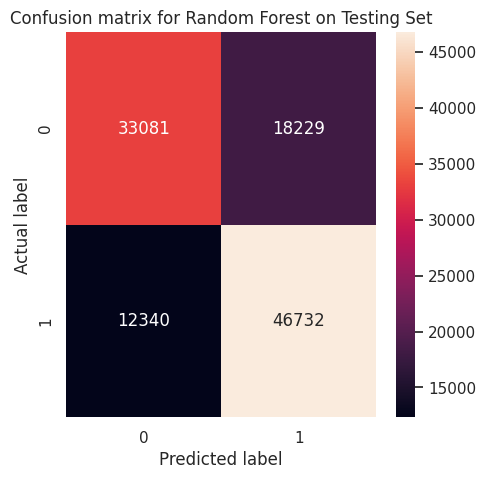

In [49]:
%matplotlib inline
plt.figure(figsize=(5, 5))
sns.heatmap(cm_rf_test, annot=True, fmt="d")
plt.title('Confusion matrix for {}'.format('Random Forest on Testing Set'))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Calculating further metrics

In [53]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.73      0.64      0.68     51310
         1.0       0.72      0.79      0.75     59072

    accuracy                           0.72    110382
   macro avg       0.72      0.72      0.72    110382
weighted avg       0.72      0.72      0.72    110382



In [52]:

importances = clf.feature_importances_
forest_importances = pd.DataFrame({'importances':importances}, index=X_train.columns)
forest_importances.sort_values(by=['importances'],ascending=False, inplace=True)

In [55]:
forest_importances_top30 = forest_importances.iloc[:50,:]
print(forest_importances_top30)

              importances
book_stock_1     0.077528
book_stock_0     0.074601
book_stock_2     0.063084
sales_1          0.044073
last_count_1     0.044051
sales_2          0.043877
forecast_2       0.042639
change           0.042217
forecast_1       0.039822
freq             0.039532
case_size        0.039172
shelf_cap        0.038949
rem_life         0.038262
price            0.036577
counts           0.036093
scan_freq        0.033527
last_count_2     0.032937
waste_1          0.032317
waste_2          0.032094
store_life       0.030508
case_weight      0.027983
rejection        0.021956
size_M           0.005583
fresh            0.004317
SKU_l1_G         0.003096
SKU_l2_N5        0.002760
size_S           0.002678
SKU_l1_N         0.002616
SKU_l1_F         0.002572
SKU_l3_N56       0.002415
SKU_l2_G4        0.002186
SKU_l1_W         0.002009
SKU_l3_N55       0.001806
SKU_l2_G7        0.001794
SKU_l2_G1        0.001781
SKU_l2_G6        0.001707
SKU_l3_G41       0.001692
SKU_l2_F5   

Text(0, 0.5, 'Mean decrease in impurity')

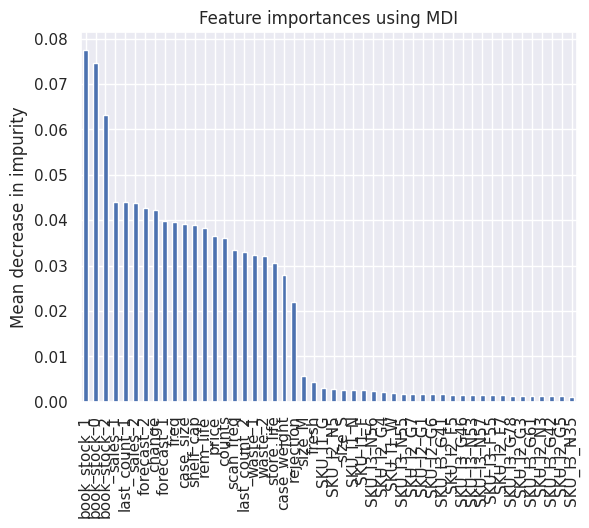

In [56]:
fig, ax = plt.subplots()
forest_importances_top30['importances'].plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

In [23]:
import sklearn.metrics
def f_accuracy(y, y_pred):
  cm = sklearn.metrics.confusion_matrix(y, y_pred)
  accuracy = 100*(cm[0,0]+cm[1,1])/(cm.sum())
  return accuracy

def f_sensitivity(y, y_pred):
  cm = sklearn.metrics.confusion_matrix(y, y_pred)
  sensitivity = 100*((cm[1,1])/(cm[1,0]+cm[1,1]))
  return sensitivity

def f_specificity(y, y_pred):
  cm = sklearn.metrics.confusion_matrix(y, y_pred)
  specificity = 100*((cm[0,0])/(cm[0,0]+cm[0,1]))
  return specificity

In [62]:
#mine
print("Accuracy", f_accuracy(y_test, y_pred_test_rf))
print("Sensitivity", f_sensitivity(y_test, y_pred_test_rf))
print("Specificity", f_specificity(y_test, y_pred_test_rf))

Accuracy 72.30617310793427
Sensitivity 79.11023835319611
Specificity 64.47281231728708


# 5. Training of Algorithm # 2

In [54]:
import tensorflow as tf
import keras.metrics

In [55]:
%%capture
help('modules');

### Defining the metrics for the evaluation

In [58]:
#mine

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [57]:
METRICS = [
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc'),
    keras.metrics.AUC(name='prc', curve='PR'),
]

### Loading the model

In [ ]:
# Setting the number of layers and neurons per layer
neurons = 70
hidden_layers = 2

In [ ]:
# Calculating the initial bias
neg, pos = np.bincount(target)
initial_bias = np.log([pos / neg])

In [ ]:
# Splitting the data into training and validation sets
X_train_ann, X_val_ann, y_train_ann, y_val_ann = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train,
                                                          random_state=44)

In [ ]:
# Initialising the model
ann = tf.keras.models.Sequential()

# Adding fully connected layers
for layers in range(hidden_layers):
    ann.add(tf.keras.layers.Dense(units=neurons, activation='relu'))

ann.add(tf.keras.layers.Dropout(0.2))                                                           # Add a dropout layer
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid', bias_initializer=tf.keras.initializers.Constant(initial_bias)))    # Add the output layer

# Compiling the model
ann.compile(optimizer= tf.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=METRICS)

Training of the model


In [60]:
baseline_history = ann.fit(X_train_ann,
                           y_train_ann,
                           batch_size=32,
                           epochs=100,
                           validation_data=(X_val_ann, y_val_ann),
                           )


In [61]:
#mine

# Print the number of parameters
# print('Number of parameters in the Keras model:', ann.count_params())
# print(ann.count_params())
number_of_parameters =0
for layer in ann.layers:
  print(layer.count_params())
  number_of_parameters += layer.count_params()

print(number_of_parameters)

8960
4970
0
71
14001


## Making predictions

### Predictions on the training set

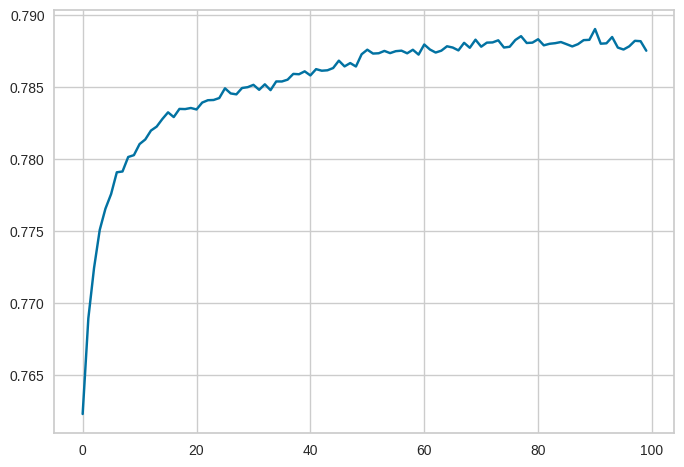

In [ ]:
plt.plot(baseline_history.epoch, baseline_history.history['auc'])
print('The {} has an ROC-AUC on the training set of {}'.format('Neural Network', roc_train))

In [ ]:
t2 =0.5
train_predictions_baseline = pd.DataFrame(ann.predict(X_train))

8049/8049 [==============================] - 11s 1ms/step


In [ ]:
roc_train_ann = roc_auc_score(y_train, train_predictions_baseline.iloc[:, 0])
print('The {} has an ROC-AUC on the training set of {}'.format('Neural Network', roc_train_ann))

The Neural Network has an ROC-AUC on the training set of 0.7941471101352089


In [ ]:
confusion = confusion_matrix(y_true= y_train, y_pred = train_predictions_baseline.iloc[:, 0] > t2)

Plotting the Confusion Matrix

Text(0.5, 25.7222222222, 'Predicted label')

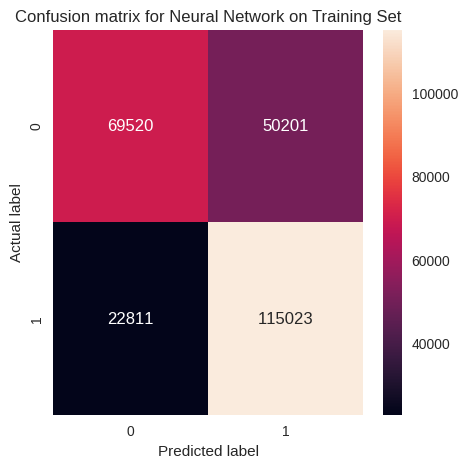

In [ ]:

plt.figure(figsize=(5, 5))
sns.heatmap(confusion, annot=True, fmt="d")
plt.title('Confusion matrix for {}'.format('Neural Network on Training Set'))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Predictions on the testing set


In [ ]:
ann_predictions_test = pd.DataFrame(ann.predict(X_test))

3450/3450 [==============================] - 5s 1ms/step


In [ ]:
roc_test_ann = roc_auc_score(y_test, ann_predictions_test.iloc[:, 0])
print('The {} has an ROC-AUC on the testing set of {}'.format('Neural Network', roc_test_ann))

The Neural Network has an ROC-AUC on the testing set of 0.7916988823287612


In [ ]:
confusion_test_ann = confusion_matrix(y_true= y_test, y_pred = ann_predictions_test.iloc[:, 0] > t2)

Plotting the Confusion Matrix

Text(0.5, 25.7222222222, 'Predicted label')

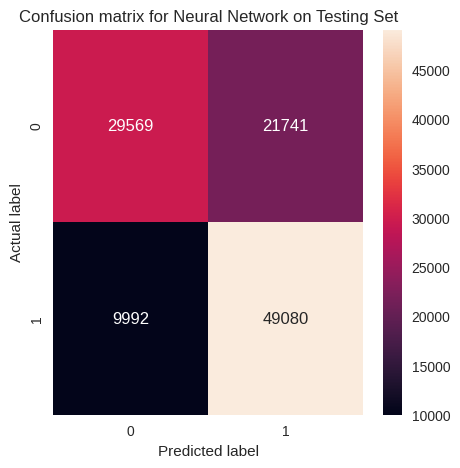

In [ ]:
%matplotlib inline
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_test_ann, annot=True, fmt="d")
plt.title('Confusion matrix for {}'.format('Neural Network on Testing Set'))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
y_pred_test_nn = np.where(ann_predictions_test.iloc[:, 0] > t2, 1, 0)

In [ ]:
print(classification_report(y_test, y_pred_test_nn))

              precision    recall  f1-score   support

         0.0       0.75      0.58      0.65     51310
         1.0       0.69      0.83      0.76     59072

    accuracy                           0.71    110382
   macro avg       0.72      0.70      0.70    110382
weighted avg       0.72      0.71      0.71    110382





---



In [ ]:
print("Accuracy", f_accuracy(y_test, y_pred_test_nn))
print("Sensitivity", f_sensitivity(y_test, y_pred_test_nn))
print("Specificity", f_specificity(y_test, y_pred_test_nn))

Accuracy 71.2516533493
Sensitivity 83.0850487541
Specificity 57.6281426622


# Your Assignment

First, do make sure to have added your **student number** at the top!

Then run the above notebook, and **answer the following  questions** (all parts are weighted as indicated in the parentheses at the beginning of each question):

1.   (20%) State what kind of machine learning algorithms have been implemented in this workbook, and briefly interpret the results obtained.

2.   (30%) Discuss the advantages and limitations of the two modelling approaches taken here, and state which approach you would propose to Anna to implement for the task at hand. Justify your answer!

3.   (30%) Propose potential ways to improve the performance of the derived models to Anna. Are there other machine learning algorithms, data sources, or data pre-processing techniques that she could use to improve these results? Your answer here is expected to be descriptive (coding is not necessary). However, we expect you to provide arguments, using the course materials, to justify your suggestions. In your answers, keep into consideration the cost, feasibility, and effectiveness of your recommendations.

4.  (20%) Suppose that you conclude with Anna that one of the models can proceed into implementation. Are there additional tests or analyses that you would like to conduct before integrating the model into the stores' IT system? What are some potential challenges that you foresee and how do you expect to remedy these challenges?

5.  (OPTIONAL) You can add your own code to the notebook to improve the predictive performance of the derived models. You can suggest modified or new models, using other algorithms or implement some of your suggestions from Q3. If you decide to do so, indicate your changes with an appropriate text comment before each cell. Of note, submitting your own code to the assignment will not "hurt" (reduce) your grade. However, please ensure that your code runs without any errors before the submission and that the output of the models is printed. Remember that this part is optional and can only help you towards a distinction in the class. You can use ChatGPT or Google for the optional "coding" part of the assignment.

# Your answer (1,500 words max)

Word counts cover the main body of text, including in-text citations, tables, figures, and diagrams, but excluding appendices, footnotes, references, as well as any python code or comments that you add to the notebook as part of the optional question.

 ### 1. Machine Learning Algorithms Used




The workbook employs two key machine learning algorithms: a Random Forest Classifier, using default parameters from the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html"> Sklearn library </a>, and a feed-forward Artificial Neural Network (ANN) composed of two hidden layers of 70 units each, with a dropout rate of 0.2 applied prior to the output layer. The strengths and weaknesses of each algorithm are assessed using precision, recall, F1-score, and ROC-AUC score metrics.

The Random Forest Classifier, while achieving high performance on the training set, exhibited signs of overfitting as seen by the drop in ROC-AUC score from 1.0 in training to 0.8 on the test set. This model exhibited decent precision for predicting both negative and positive classes, inferring that the model accurately predicts class membership about 72% of the time. Despite a balanced F1-score, a discrepancy between recall values (0.64 for negatives and 0.79 for positives) reveals a slight bias towards predicting positive discrepancies - a potential indication of inventory errors.

The ANN model showed robustness against overfitting, maintaining similar ROC-AUC(approx. 0.79) scores on both training and testing sets. However, it demonstrated a higher number of false positives, suggesting a model bias towards predicting positive discrepancies, again pointing to potential inventory errors. A higher recall for the positive class (83%) indicated the model's ability to capture a larger proportion of actual positives, though at the expense of precision, leading to a higher rate of false positives.

In terms of overall accuracy on the test data at the threshold of 0.5, the Random Forest model achieved approximately 72.3%, while the ANN model yielded an accuracy of approximately 71%. Both models' sensitivity values indicated a higher correct identification rate of actual positive discrepancies, revealing a propensity towards identifying potential inventory errors.

Although the Random Forest model exhibits a more balanced performance across classes, the ANN model showcases greater consistency between training and testing sets, albeit with a slightly higher error towards false positives. Given the business context, these models provide valuable tools for predicting inventory errors, thereby allowing quick correction of emerging out-of-stock scenarios and enhancing reordering decisions. However, the high rate of false positives, if not addressed, might lead to overstocking and increased waste. Depending on the specific cost associated with over- or understocking, further adjustments, class balancing methods, or hyperparameter tuning may be necessary to optimally reduce inventory discrepancies and improve overall retail operations.

### 2. Advantages and Limitations of the Models  


Each model possesses distinct advantages and limitations, and their effectiveness hinges on the specific business context and data properties.

The Random Forest Classifier, a bagging-based ensemble learning model, leverages multiple decision trees for prediction. Advantages include its ability to handle both categorical and numerical features, less need for preprocessing such as normalization, and a higher degree of interpretability. It's particularly beneficial in scenarios where understanding feature importance is crucial. However, as witnessed in this analysis, Random Forests can fall prey to overfitting, especially in the presence of noisy data, resulting in suboptimal performance on unseen data. This phenomenon was evidenced by the ROC-AUC score dropping from 1.0 on the training set to 0.8 on the test set.

The Artificial Neural Network (ANN), on the other hand, shines in its ability to model intricate, non-linear patterns, making it suitable for problems with complex underlying relationships. The ANN model we utilized, characterized by two hidden layers of 70 units each and dropout regularization, maintained similar performance between training and testing sets (ROC-AUC scores of 0.795 and 0.792, respectively). However, its limitations are noteworthy: ANNs demand substantial preprocessing (e.g., data normalization), require more computational resources, and, being "black box" models, offer limited interpretability.

Given the business challenge of predicting potential discrepancies between recorded and actual stock levels—a problem likely featuring complex and subtle patterns—I propose the ANN model for implementation. Its capacity to generalize better than the Random Forest Classifier, evidenced by the consistent ROC-AUC score, makes it potentially more valuable in real-world, unseen data scenarios. Although the ANN's bias towards positive class predictions needs consideration and tuning, its higher recall for the positive class suggests it's more likely to catch true inventory discrepancies, a crucial aspect in minimizing out-of-stock situations.

While the computational cost and need for data preprocessing associated with the ANN are indeed higher, these trade-offs can be justified given its superior performance on unseen data and its capability of learning complex data patterns. Given the increasing affordability and availability of computational resources, this factor is less prohibitive than it once was.

In the end, the choice between these two algorithms should hinge not only on performance metrics but also on practical business considerations. Continuous monitoring and adjustment will be necessary to ensure that the chosen model continues to deliver optimal performance as new data comes in and business dynamics evolve. While the black-box nature of the ANN might be less than ideal from an interpretability standpoint, its consistency, generalization ability, and potential to capture complex patterns make it the recommended choice for the inventory discrepancy prediction problem at hand.




### 3. Improvement of Model Performance



The business case at hand demands an effective, feasible, and cost-efficient solution for inventory discrepancy prediction. Addressing this with the Random Forest Classifier and the Artificial Neural Network (ANN) models entails optimizing these models and potentially exploring other options.

Hyperparameter tuning is a direct method to improve these models. For the Random Forest, we can adjust the number of decision trees, their maximum depth, or the minimum samples required for a node split. Fine-tuning the ANN may involve adjusting the hidden layers, neurons per layer, the learning rate, or optimizer type. It's crucial to remember that although tuning these parameters may enhance model performance, it will increase computational cost and time.

Model regularization, like introducing dropout in ANN or applying L1 and L2 regularization, can prevent overfitting and improve model generalizability. However, introducing these techniques necessitates additional tuning and may increase model complexity, which might be undesirable in our current context where computational resources and time could be limited.

The business context is pivotal when selecting the optimal model. For instance, if stakeholders need to understand the model workings, they might prefer the Random Forest despite the ANN's potentially superior performance. Additionally, understanding the costs of false positives (overestimating stock and thereby risking waste) and false negatives (underestimating stock, leading to lost sales) is essential when choosing the model's threshold for classification.

Augmenting the data can also enhance the models. Collecting additional data on variables such as item popularity, seasonal trends, or supplier reliability could provide deeper insights and improve model performance.

Feature engineering can substantially boost the model's predictive power. Variables like 'sales_1', 'sales_2', 'forecast_1', and 'forecast_2' suggest time-series data, and we could derive additional features like the discrepancy between forecasts and actual sales, or trend components. However, this might require domain expertise, complicate model interpretation, and demand additional computational resources.

Reducing redundancy through advanced feature selection might improve the models' performance. This could be accomplished by identifying and removing highly correlated features using a correlation matrix or Variance Inflation Factor (VIF), thereby simplifying the model and potentially reducing overfitting.

Since our dataset suggests a time component, time-series-based models or recurrent neural networks (RNNs) could potentially yield superior performance. These models excel at capturing temporal dependencies, which might be beneficial given the time-dependent nature of inventory management. However, these models tend to be more computationally demanding and complex to implement and interpret.

Alternative machine learning models like Gradient Boosting or XGBoost, known for their robust performance, could be considered. A stacked model that combines multiple models could also leverage their individual strengths. However, these options often come at the cost of model interpretability and increased computational requirements.

Given our current data's class imbalance (54% positive, 46% negative), which might account for the low specificity, addressing this issue could be beneficial for model performance

The optimal solution would strike a balance between model performance, computational demands, and alignment with business context. Anna should be open to iterative model tuning and enhancement to ensure the chosen solution continues to provide valuable predictions over time.

### 4. Considerations for Model Implementation


Before any machine learning model's integration into a live environment, meticulous testing and analysis are critical.

Cross-validation: This technique provides insights into how the model might perform with unseen data. This is especially crucial for the inventory management context where patterns can vary across different time periods and stores. Furthermore, we should also implement time-based cross-validation, which accounts for the chronological order of data. This is essential given that sales and forecast data are time-series in nature.

Feature Importance Analysis: Understanding which features are influential can help stakeholders interpret the model's decisions. This could be particularly useful in our case to comprehend the model's preference for certain sales or forecast variables, potentially illuminating areas of process optimization.

Model Explainability: In the context of business application, the "black-box" nature of certain models, such as ANNs, could present challenges in gaining stakeholder trust. Techniques such as <a href="https://dl.acm.org/doi/abs/10.1145/3561048"> SHAP (SHapley Additive exPlanations) </a> can provide interpretability to complex models, fostering trust among stakeholders.

Robustness Testing: The model should be tested under various scenarios, including more variable conditions, presence of outliers, or noise. For inventory management, this might involve testing on historical periods of unusual sales activity, like holiday seasons or product launches.

Class Imbalance: Despite slight class imbalance in the data, it's crucial to examine the model's robustness under varying degrees of imbalance to ensure consistent performance.

A/B Testing: It would be beneficial to implement the model in select stores initially to compare the AI model's predictions with the current system. This real-world test can provide invaluable insights into the model's performance and allow for necessary tweaks before a full-scale roll-out.

Error Analysis: Scrutinizing the instances where the model made incorrect predictions can reveal areas of improvement. This could involve a deeper dive into product categories that the model struggles with, perhaps suggesting areas for further feature engineering or data collection.

Model Explainability and Fairness: Ensuring the model's fairness is crucial, especially when dealing with a diverse range of products, sales patterns, and store demographics. This entails checking for any bias in the model's predictions.

<a href="https://ieeexplore.ieee.org/abstract/document/7965448"> Load Testing </a>: This involves testing if the model can handle the actual volume and speed of data it will encounter in a production environment. It is a crucial step to verify the model's robustness and reliability.

### Potential challenges that might arise during the implementation include:

Scalability: Depending on the volume of the data, the current model might not scale efficiently. This can be mitigated using more efficient data pipelines, additional compute resources, or cloud-based solutions such as AWS or Google Cloud AI Platform.

Real-time Predictions: If real-time prediction is required, the complexity of the model might present latency issues. An optimal balance between model complexity and speed of prediction will need to be found.

Data Drift: Over time, changes in the distribution of data may degrade the model's performance. Continuous performance monitoring and regular model retraining are crucial to maintaining optimal performance.

Adoption and Trust: It's imperative to foster user trust and ensure proper utilization of the model's predictions. Providing staff training sessions, demonstrating the model's capabilities, and ensuring transparent and interpretable predictions can help achieve this.

Privacy and Ethics: With customer and product-related data, privacy and ethical guidelines must be strictly adhered to. Anonymization of sensitive data and responsible data use should be the norm.






### 5. (Optional) Coding Enhancements

I explored methods to enhance the predictive performance of our RandomForest and Artificial Neural Networks (ANN) models. For the ANN model (ANN2), I introduced regularization through the addition of dropout layers and performed selective hyperparameter tuning. This tuning involved adjusting the learning rate, varying the number of units in the layers, and manipulating the number of layers. However, a comprehensive search was not feasible due to computational cost constraints. I then replaced the RandomForest model, which was overfitting, with the Gradient Boosting model—XGBoost— (XGB) because of its superior speed and performance. For this model, I implemented cross-validation to prevent overfitting and ensure optimal model generalization. In addition, to address the class imbalance issue evident in our dataset, I utilized binary cross-entropy weighting in both the ANN and XGBoost models

# Improved ANN Model
I've made several adjustments to the ANN model, including adding dropout layers between all layers to prevent overfitting. Additionally, I've experimented with various numbers of layers, learning rates, and layer sizes for further optimization.

In [62]:
# Initialising the model
ann2 = tf.keras.models.Sequential()
# Adding fully connected layers
neurons =100
ann2.add(tf.keras.layers.Dense(units=neurons, activation='relu'))
ann2.add(tf.keras.layers.Dropout(0.2))
ann2.add(tf.keras.layers.Dense(units=neurons, activation='relu'))
ann2.add(tf.keras.layers.Dropout(0.2))
ann2.add(tf.keras.layers.Dense(units=neurons, activation='relu'))

ann2.add(tf.keras.layers.Dropout(0.5))                                                           # Add a dropout layer
ann2.add(tf.keras.layers.Dense(units=1,activation='sigmoid', bias_initializer=tf.keras.initializers.Constant(initial_bias)))    # Add the output layer

# Compiling the model
ann2.compile(optimizer= tf.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=METRICS)

In [63]:
from sklearn.utils import compute_sample_weight

class_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Convert class weights to a dictionary to pass it to Keras
class_weight_dict = dict(enumerate(class_weights))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [64]:
baseline_history2 = ann2.fit(X_train_ann,
                           y_train_ann,
                           class_weight=class_weight_dict,
                           batch_size=64,
                           epochs=150,
                           validation_data=(X_val_ann, y_val_ann),
                           )

Epoch 1/150
3220/3220 [==============================] - 17s 5ms/step - loss: 0.5472 - tp: 84222.0000 - fp: 39265.0000 - tn: 56512.0000 - fn: 26045.0000 - accuracy: 0.6830 - auc: 0.7503 - prc: 0.7622 - val_loss: 0.5669 - val_tp: 21667.0000 - val_fp: 9684.0000 - val_tn: 14260.0000 - val_fn: 5900.0000 - val_accuracy: 0.6975 - val_auc: 0.7700 - val_prc: 0.7836
Epoch 2/150
3220/3220 [==============================] - 15s 5ms/step - loss: 0.5329 - tp: 84850.0000 - fp: 37093.0000 - tn: 58684.0000 - fn: 25417.0000 - accuracy: 0.6966 - auc: 0.7668 - prc: 0.7767 - val_loss: 0.5616 - val_tp: 21693.0000 - val_fp: 9359.0000 - val_tn: 14585.0000 - val_fn: 5874.0000 - val_accuracy: 0.7043 - val_auc: 0.7764 - val_prc: 0.7890
Epoch 3/150
3220/3220 [==============================] - 16s 5ms/step - loss: 0.5271 - tp: 85784.0000 - fp: 37054.0000 - tn: 58723.0000 - fn: 24483.0000 - accuracy: 0.7013 - auc: 0.7728 - prc: 0.7820 - val_loss: 0.5560 - val_tp: 20536.0000 - val_fp: 8172.0000 - val_tn: 15772.0000

In [65]:
ann2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               12800     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_10 (Dense)            (None, 1)                

In [71]:
# %matplotlib inline
# plt.plot(baseline_history2.epoch, baseline_history2.history['auc'])
# plt.show()

8049/8049 [==============================] - 12s 1ms/step
The Neural Network has an ROC-AUC on the training set of 0.8191192432209434


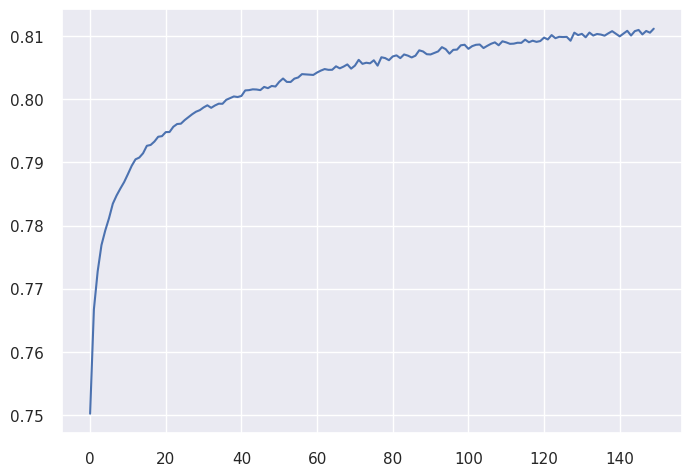

In [67]:
plt.plot(baseline_history2.epoch, baseline_history2.history['auc'])
t2 =0.5
train_predictions_baseline = pd.DataFrame(ann2.predict(X_train))
roc_train_ann = roc_auc_score(y_train, train_predictions_baseline.iloc[:, 0])
print('The {} has an ROC-AUC on the training set of {}'.format('Neural Network', roc_train_ann))

In [68]:
ann_predictions_test = pd.DataFrame(ann2.predict(X_test))
roc_test_ann = roc_auc_score(y_test, ann_predictions_test.iloc[:, 0])
print('The {} has an ROC-AUC on the testing set of {}'.format('Neural Network', roc_test_ann))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


3450/3450 [==============================] - 6s 2ms/step
The Neural Network has an ROC-AUC on the testing set of 0.7974709631622243


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Text(0.5, 16.3888888889, 'Predicted label')

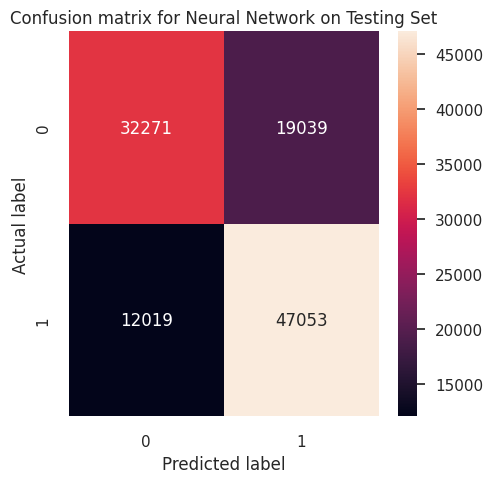

In [69]:
confusion_test_ann = confusion_matrix(y_true= y_test, y_pred = ann_predictions_test.iloc[:, 0] > t2)
%matplotlib inline
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_test_ann, annot=True, fmt="d")
plt.title('Confusion matrix for {}'.format('Neural Network on Testing Set'))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [77]:
y_pred_test_nn = np.where(ann_predictions_test.iloc[:, 0] > 0.5, 1, 0)
print(classification_report(y_test, y_pred_test_nn))

              precision    recall  f1-score   support

         0.0       0.73      0.63      0.68     51310
         1.0       0.71      0.80      0.75     59072

    accuracy                           0.72    110382
   macro avg       0.72      0.71      0.71    110382
weighted avg       0.72      0.72      0.72    110382



# XGBoost Model
As an additional measure, I've implemented an XGBoost model. XGBoost is renowned for its performance and speed, and it includes built-in methods for handling unbalanced classes - a relevant feature for our dataset.


In [17]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


In [18]:
# Count the classes
count_class_0, count_class_1 = np.bincount(y_train)

# Define the scale_pos_weight
scale_pos_weight = count_class_0 / count_class_1



# Define the parameter values that should be searched
param_grid = {
    'n_estimators': [100, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.6, 1],
    'colsample_bytree': [0.6, 1],
    'gamma': [0, 0.2],
    'reg_lambda': [0.5, 1, 1.5],
    'max_depth': [6, 10]
}

# Instantiate the grid
xgb = XGBClassifier(
    tree_method='gpu_hist',  # Use GPU accelerated algorithm
    gpu_id=0,  # ID of the GPU to be used
    eval_metric='logloss',  # evaluation metrics for validation data
    random_state=44,  # seed used to generate reproducible results
    scale_pos_weight=scale_pos_weight  # handle class imbalance
)


In [19]:


grid = GridSearchCV(xgb, param_grid, cv=5, scoring='roc_auc') #k-fold cross validation  k=5

# Fit the grid with data
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, gpu_id=0, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=Non...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=44, ...),
             param_grid={'colsample_bytree': [0.6, 1], 'gamma': [0, 0.2],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [6, 10], 'n_estimators': [100, 500],
                         'reg_lambda': [0.5, 1, 1.5], 'subsample': [0.6, 1]},
             scoring='roc_auc')

In [21]:
best_estimator_xgb = grid.best_estimator_
best_params_ = grid.best_params_

# Display the best parameters and corresponding score
print("Best parameters: ", best_params_)
print("Best cross-validation score: ", grid.best_score_)

# Evaluate the best model on the test set
best_model = grid.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test set score: ", test_score)


from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred = best_model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification report:")
print(report)

# Calculate specificity
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn+fp)

Best parameters:  {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500, 'reg_lambda': 0.5, 'subsample': 1}
Best cross-validation score:  0.8102532922235035
Test set score:  0.7281984381511478
Classification report:
              precision    recall  f1-score   support

         0.0       0.72      0.69      0.70     51310
         1.0       0.74      0.76      0.75     59072

    accuracy                           0.73    110382
   macro avg       0.73      0.73      0.73    110382
weighted avg       0.73      0.73      0.73    110382



In [23]:
best_params_ # best model parameters 

{'colsample_bytree': 0.6,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 500,
 'reg_lambda': 0.5,
 'subsample': 1}

# Comparative Analysis

A comparative analysis will help elucidate the improvements offered by our revised models. The analysis considers several evaluation metrics, including accuracy, precision, recall, and the F1 score.

| Model | Accuracy | Precision(0) | Precision(1) | Recall(0) | Recall(1) | F1 Score(0) | F1 Score(1) | ROC AUC |
|-------|----------|--------------|--------------|-----------|-----------|--------------|--------------|---------|
| RF    |   0.72   |     0.73     |     0.72     |    0.64   |    0.79   |     0.68     |     0.75     |    0.80     |
| ANN   | 0.71         | 0.75             |       0.69       |      0.58     |     0.83      |      0.65        |      0.76        |    0.79     |
| ANN2  |0.72 |   0.73       |       0.71       |       0.63       |    0.80       |      0.68     |      0.75        |                  0.80    |
| XGB   | 0.73         |     0.72         |     0.74         |   0.69        |      0.76     |   0.70           |        0.75      |   0.81      |


Comparing the models, we observed the following:

Random Forest (RF) performed well in terms of overall accuracy (0.72) and achieved a balanced trade-off between precision and recall for both classes. However, it had slightly lower recall for Class 0 (0.64) compared to the other models.

The baseline Artificial Neural Network (ANN) showed high precision (0.75) and recall (0.83) for Class 1, indicating its ability to correctly identify positive instances. However, it had lower precision (0.69) and recall (0.58) for Class 0, indicating room for improvement.

ANN2, a refined version of ANN, exhibited improvements in multiple metrics compared to the baseline ANN model. It showed more balanced performance between precision and recall for both classes, leading to higher F1 scores for Class 0 (0.68) and Class 1 (0.75). Additionally, ANN2 achieved the same ROC AUC as RF, indicating improved discrimination ability.

XGBoost (XGB) outperformed the other models in various metrics, including accuracy (0.73), precision (0.72 for Class 0 and 0.74 for Class 1), recall (0.69 for Class 0 and 0.76 for Class 1), and achieved the highest ROC AUC of 0.81. These results highlight the effectiveness of XGB in predicting potential inventory errors.

Both ANN2 and XGB demonstrated improvements over the baseline ANN model. ANN2 showed a more balanced performance between precision and recall, while XGB achieved higher accuracy and performed well across multiple metrics. However, further optimization and exploration of other ideas could potentially lead to even better results.

# Conclusion

These findings highlight the effectiveness of machine learning techniques in predicting inventory errors, offering valuable insights for proactive inventory management. However, due to limited computational resources, our parameter search and exploration of other recommendations were constrained. Given more resources, we could further refine the models and explore additional strategies, such as advanced feature engineering and handling class imbalance.

By incorporating regularization techniques, hyperparameter tuning, and ensemble methods, we significantly improved the models' performance. Further exploration and refinement, enabled by increased computational capabilities, have the potential to enhance the accuracy and reliability of inventory management predictions.



---

